In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install request
!pip install fosforml

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 8.3MB 10.3MB/s eta 0:00:01
     |████████████████████████████████| 327kB 75.0MB/s eta 0:00:01
     |████████████████████████████████| 112kB 102.2MB/s eta 0:00:01
     |████████████████████████████████| 4.6MB 91.0MB/s eta 0:00:01
     |████████████████████████████████| 4.4MB 85.6MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 70.7MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 13.4MB 9.0MB/s eta 0:00:01
     |████████████████████████████████| 38.6MB 92.9MB/s eta 0:00:01
     |████████████████████████████████| 307kB 88.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ER

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#energyDataset = pd.read_excel('Energy_Inventory.xlsx')

In [5]:
actualVolumes = energyDataset[energyDataset['FLAGACTUAL'] == 'Yes']
targetVolumes = energyDataset[energyDataset['ITEM_TYPE'] == 'TargetInventory']
print(len(actualVolumes), len(targetVolumes))

38558 34905


In [6]:
uniqueCombinations = actualVolumes.drop_duplicates(subset=['STOCK_FAMILY', 'STOCK_CATEGORY_NEW', 'STOCK_CATEGORY','STOCK_SUB_CATEGORY','INVENTORY_DATE','PLANT_NAME'])

# Compare lengths
if len(actualVolumes) == len(uniqueCombinations):
    print("All records are unique based on the combination of the six columns.")
else:
    print("There are duplicate records based on the combination of the six columns.")
print(len(actualVolumes) , len(uniqueCombinations))

There are duplicate records based on the combination of the six columns.
38558 27770


In [7]:
uniqueCombinations = targetVolumes.drop_duplicates(subset=['STOCK_FAMILY', 'STOCK_CATEGORY_NEW', 'STOCK_CATEGORY','STOCK_SUB_CATEGORY','INVENTORY_DATE','PLANT_NAME'])

# Compare lengths
if len(targetVolumes) == len(uniqueCombinations):
    print("All records are unique based on the combination of the six columns.")
else:
    print("There are duplicate records based on the combination of the six columns.")
print(len(targetVolumes) , len(uniqueCombinations))

There are duplicate records based on the combination of the six columns.
34905 34827


In [8]:
groupedActual = actualVolumes.groupby(['STOCK_FAMILY', 'STOCK_CATEGORY_NEW', 'STOCK_CATEGORY','STOCK_SUB_CATEGORY','INVENTORY_DATE','PLANT_NAME','ITEM_TYPE','TRANSIT_TYPE','TERMINAL_TYPE','REFINERY_AREA_DESC','PW_LOCATION_CODE','PW_LOCATION_LEVEL_0','PW_LOCATION_LEVEL_1','PW_LOCATION_LEVEL_2','PW_LOCATION_LEVEL_3','REFINERY_AREA','PLANT_STATUS'])[['VOLUME_MBD']].sum().reset_index()
print(len(actualVolumes) , len(groupedActual))

38558 27770


In [9]:
groupedTarget = targetVolumes.groupby(['STOCK_FAMILY', 'STOCK_CATEGORY_NEW', 'STOCK_CATEGORY','STOCK_SUB_CATEGORY','INVENTORY_DATE','PLANT_NAME','TARGET_TYPE'])[['VOLUME_MBD']].sum().reset_index()
print(len(targetVolumes) , len(groupedTarget))

34905 34827


In [10]:
groupedActual = groupedActual.rename(columns={'VOLUME_MBD':'VOLUME_MBD_ACTUAL'})

groupedTarget = groupedTarget.rename(columns={'VOLUME_MBD':'VOLUME_MBD_TARGET'})


In [11]:
merged_df = pd.merge(groupedTarget, groupedActual , on=['STOCK_FAMILY', 'STOCK_CATEGORY_NEW', 'STOCK_CATEGORY','STOCK_SUB_CATEGORY','INVENTORY_DATE','PLANT_NAME'])
pd.set_option('display.max_columns', None)
merged_df

,STOCK_FAMILY,STOCK_CATEGORY_NEW,STOCK_CATEGORY,STOCK_SUB_CATEGORY,INVENTORY_DATE,PLANT_NAME,TARGET_TYPE,VOLUME_MBD_TARGET,ITEM_TYPE,TRANSIT_TYPE,TERMINAL_TYPE,REFINERY_AREA_DESC,PW_LOCATION_CODE,PW_LOCATION_LEVEL_0,PW_LOCATION_LEVEL_1,PW_LOCATION_LEVEL_2,PW_LOCATION_LEVEL_3,REFINERY_AREA,PLANT_STATUS,VOLUME_MBD_ACTUAL
0,CRUDE,CRUDE,CRUDE,CRUDE,2019-12-31,EL SEGUNDO CA RFY CHEVRON,Defined,2345.00,BookInventory,InTank,Refinery,El Segundo,EL SEGUNDO,US WEST COAST,EL SEGUNDO SUPPLY AREA,EL SEGUNDO REFINERY,EL SEGUNDO,ELSE,Active,2162.75
1,CRUDE,CRUDE,CRUDE,CRUDE,2019-12-31,PASADENA TX RFY CHEVRON,Defined,745.00,BookInventory,InTank,Refinery,Pasadena,PASADENA,US EAST,PASADENA SUPPLY AREA,PASADENA REFINERY,PASADENA,PASA,Active,1325.86
2,CRUDE,CRUDE,CRUDE,CRUDE,2019-12-31,PASCAGOULA MS RFY CHEVRON,Defined,2186.00,BookInventory,InTank,Refinery,Pascagoula,PASCAGOULA,US EAST,PASCAGOULA SUPPLY AREA,PASCAGOULA REFINERY,PASCAGOULA,PASC,Active,1920.00
3,CRUDE,CRUDE,CRUDE,CRUDE,2019-12-31,RICHMOND CA RFY CHEVRON,Defined,1780.00,BookInventory,InTank,Refinery,Richmond,RICHMOND,US WEST COAST,RICHMOND SUPPLY AREA,BAY AREA,BAPL,RICH,Active,2162.69
4,CRUDE,CRUDE,CRUDE,CRUDE,2019-12-31,SALT LAKE CITY UT RFY CHEVRON,Defined,260.00,BookInventory,InTank,Refinery,Salt Lake,SALT LAKE REFINERY,SALT LAKE OPT AREA,SALT LAKE REFINERY,SALT LAKE REFINERY,SALT LAKE REFINERY,SLAK,Active,322.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26990,PRODUCTS,GASOLINE,MOGAS,RUL,2022-10-31,WASKOM TX TRM SUNOCO,Calculated,4.23,BookInventory,InTank,Terminal,Pascagoula,PANAMA CITY,US EAST,PASCAGOULA SUPPLY AREA,FLORIDA,PANAMA CITY,PASC,Active,4.45
26991,PRODUCTS,GASOLINE,MOGAS,RUL,2022-10-31,WATSON PPL CA INTRANSIT,Calculated,107.85,BookInventory,InTransit,InTransit,El Segundo,KM SOCAL,US WEST COAST,EL SEGUNDO SUPPLY AREA,SOCAL AREA,KM SOCAL,ELSE,Active,27.66
26992,PRODUCTS,GASOLINE,MOGAS,RUL,2022-10-31,WILLIAMS PPL OK INTRANSIT,Calculated,2.20,BookInventory,InTransit,InTransit,Pascagoula,PANAMA CITY,US EAST,PASCAGOULA SUPPLY AREA,FLORIDA,PANAMA CITY,PASC,Active,2.04
26993,PRODUCTS,GASOLINE,MOGAS,RUL,2022-10-31,YUMBO - BUENAVENTURA PPL,Calculated,8.48,BookInventory,InTransit,InTransit,CCA,COLOMBIA,US EAST,LATAM SYSTEM,COLOMBIA,COLOMBIA,CO00,Active,11.72


In [12]:
# Check for missing values
missing_values = merged_df.isnull()
#print(missing_values)

# Count missing values in each column
missing_count = merged_df.isnull().sum()
print(missing_count)

STOCK_FAMILY           0
STOCK_CATEGORY_NEW     0
STOCK_CATEGORY         0
STOCK_SUB_CATEGORY     0
INVENTORY_DATE         0
PLANT_NAME             0
TARGET_TYPE            0
VOLUME_MBD_TARGET      0
ITEM_TYPE              0
TRANSIT_TYPE           0
TERMINAL_TYPE          0
REFINERY_AREA_DESC     0
PW_LOCATION_CODE       0
PW_LOCATION_LEVEL_0    0
PW_LOCATION_LEVEL_1    0
PW_LOCATION_LEVEL_2    0
PW_LOCATION_LEVEL_3    0
REFINERY_AREA          0
PLANT_STATUS           0
VOLUME_MBD_ACTUAL      0
dtype: int64


In [13]:
unique_values = merged_df.nunique()
print(unique_values)

STOCK_FAMILY              4
STOCK_CATEGORY_NEW        9
STOCK_CATEGORY           42
STOCK_SUB_CATEGORY       45
INVENTORY_DATE           35
PLANT_NAME              235
TARGET_TYPE               2
VOLUME_MBD_TARGET       620
ITEM_TYPE                 1
TRANSIT_TYPE              2
TERMINAL_TYPE             3
REFINERY_AREA_DESC        6
PW_LOCATION_CODE         49
PW_LOCATION_LEVEL_0       3
PW_LOCATION_LEVEL_1      10
PW_LOCATION_LEVEL_2      30
PW_LOCATION_LEVEL_3      41
REFINERY_AREA            14
PLANT_STATUS              1
VOLUME_MBD_ACTUAL      9074
dtype: int64


In [14]:
merged_df['INVENTORY_DATE'] = pd.to_datetime(merged_df['INVENTORY_DATE'])

# Extract year and month
merged_df['YEAR'] = merged_df['INVENTORY_DATE'].dt.year
merged_df['MONTH'] = merged_df['INVENTORY_DATE'].dt.strftime('%b')

In [15]:
merged_df.drop(['STOCK_SUB_CATEGORY','INVENTORY_DATE','PLANT_NAME','PW_LOCATION_CODE','PW_LOCATION_LEVEL_3','ITEM_TYPE','PLANT_STATUS'],axis=1, inplace=True)

In [16]:
unique_values = merged_df.nunique()
print(unique_values)

STOCK_FAMILY              4
STOCK_CATEGORY_NEW        9
STOCK_CATEGORY           42
TARGET_TYPE               2
VOLUME_MBD_TARGET       620
TRANSIT_TYPE              2
TERMINAL_TYPE             3
REFINERY_AREA_DESC        6
PW_LOCATION_LEVEL_0       3
PW_LOCATION_LEVEL_1      10
PW_LOCATION_LEVEL_2      30
REFINERY_AREA            14
VOLUME_MBD_ACTUAL      9074
YEAR                      4
MONTH                    12
dtype: int64


In [17]:
final_dataset = merged_df

In [22]:
one_hot = pd.get_dummies(final_dataset, columns=['STOCK_FAMILY', 'STOCK_CATEGORY_NEW', 'STOCK_CATEGORY',
                                           'TRANSIT_TYPE','TERMINAL_TYPE',
                                           'REFINERY_AREA_DESC','PW_LOCATION_LEVEL_0',
                                           'PW_LOCATION_LEVEL_1','PW_LOCATION_LEVEL_2','TARGET_TYPE',
                                           'REFINERY_AREA','YEAR','MONTH'], 
                                            prefix = ['STOCK_FAMILY', 'STOCK_CATEGORY_NEW', 'STOCK_CATEGORY',
                                           'TRANSIT_TYPE','TERMINAL_TYPE',
                                           'REFINERY_AREA_DESC','PW_LOCATION_LEVEL_0',
                                           'PW_LOCATION_LEVEL_1','PW_LOCATION_LEVEL_2','TARGET_TYPE',
                                           'REFINERY_AREA','YEAR','MONTH'],drop_first=True, dtype=int)
# concatenate the one-hot encoding with the original dataframe
one_hot = one_hot.drop(['VOLUME_MBD_TARGET','VOLUME_MBD_ACTUAL',], axis= 1)
df1 = pd.concat([final_dataset, one_hot], axis=1)
# drop the original 'color' column
df1 = df1.drop(['STOCK_FAMILY', 'STOCK_CATEGORY_NEW', 'STOCK_CATEGORY',
                                           'TRANSIT_TYPE','TERMINAL_TYPE',
                                           'REFINERY_AREA_DESC','PW_LOCATION_LEVEL_0',
                                           'PW_LOCATION_LEVEL_1','PW_LOCATION_LEVEL_2','TARGET_TYPE',
                                           'REFINERY_AREA','YEAR','MONTH'], axis=1)

In [23]:
X_array = df1.drop(['VOLUME_MBD_ACTUAL'], axis= 1)
y_array= df1[['VOLUME_MBD_ACTUAL']]
X = X_array.iloc[:].values
y = y_array.iloc[:].values
print(X)

[[2.345e+03 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [7.450e+02 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.186e+03 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.200e+00 0.000e+00 0.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [8.480e+00 0.000e+00 0.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.079e+01 0.000e+00 0.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]]


In [24]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(df1.drop('VOLUME_MBD_ACTUAL', axis=1), df1['VOLUME_MBD_ACTUAL'], test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = regressor.predict(X_test)


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import dash
from dash import dcc, html
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from dash.dependencies import Input, Output
import plotly.subplots as sp
import plotly.figure_factory as ff
import seaborn as sns
import scipy.stats as stats
from scipy.stats import probplot
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
results_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2'])

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    #results_df = results_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2':r2}, ignore_index=True)
    results_df = pd.concat([results_df, pd.DataFrame([{'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2':r2}])], ignore_index=True)
print(results_df)

C:\Users\10710602\AppData\Local\Temp\ipykernel_22380\1937025572.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2':r2}])], ignore_index=True)


                       Model           MSE        MAE        R2
0           LinearRegression   5216.665675  24.885685  0.811233
1                      Ridge   5220.993929  24.821837  0.811076
2                      Lasso   6124.981432  22.975998  0.778365
3                 ElasticNet   6346.318373  22.947794  0.770356
4        KNeighborsRegressor   2629.569524  15.169487  0.904848
5      DecisionTreeRegressor   4945.748360  20.364975  0.821036
6      RandomForestRegressor   2903.009888  15.392850  0.894953
7  GradientBoostingRegressor   2748.634247  17.495604  0.900539
8                        SVR  18089.116960  24.976433  0.345437


In [43]:
from sklearn.neighbors import KNeighborsRegressor

neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsRegressor(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i]=knn.score(X_train, y_train)
    
    test_accuracy[i]=knn.score(X_test, y_test)

In [37]:
knn = KNeighborsRegressor()

# Define the parameter grid for the grid search
param_grid = {
    'n_neighbors': [7,9,11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters: ", grid_search.best_params_)

# Print the best score found by the grid search
print("Best score: ", -grid_search.best_score_)

# Use the best estimator to make predictions on the test set
best_knn = grid_search.best_estimator_
predictions = best_knn.predict(X_test)

Best parameters:  {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Best score:  3540.7179970124807


In [38]:
y_pred = best_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mse)
print(rmse)
print(r2)

2319.1432591908997
48.157483937503414
0.9160807416284562


C:\Users\10710602\AppData\Local\Temp\ipykernel_22380\3303427093.py:1: RuntimeWarning: overflow encountered in expm1
  y_pred_original = np.expm1(y_pred)


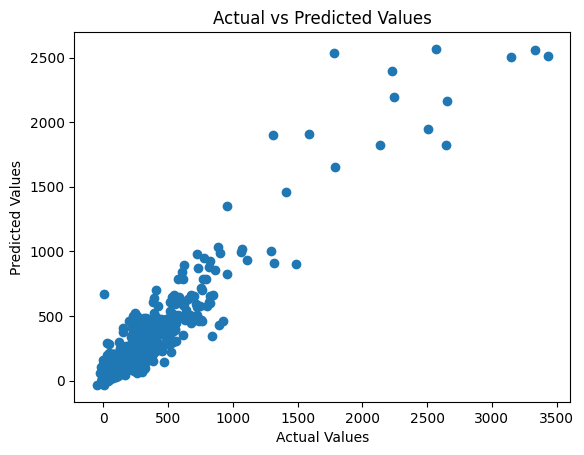

In [39]:
y_pred_original = np.expm1(y_pred)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [48]:
param_grid = {
    'n_estimators': [100,200],
    'learning_rate': [0.2],
    'max_depth': [4],
    'min_samples_split': [10],
    'min_samples_leaf': [ 4],
    'subsample': [1.0]
}
gb_reg = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params, best_model)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 1.0} GradientBoostingRegressor(learning_rate=0.2, max_depth=4, min_samples_leaf=4,
                          min_samples_split=10)


In [49]:
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [51]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 2389.343902655909
Mean Absolute Error (MAE): 15.827740764956367
R-squared (R2): 0.9135404992723872


In [52]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
                                         Feature  Importance
0                              VOLUME_MBD_TARGET    0.860765
38                          STOCK_CATEGORY_MOGAS    0.024060
117                                    YEAR_2022    0.018418
37                           STOCK_CATEGORY_LSWR    0.016793
54                        TERMINAL_TYPE_Refinery    0.010835
..                                           ...         ...
92        PW_LOCATION_LEVEL_2_POCATELLO TERMINAL    0.000000
93            PW_LOCATION_LEVEL_2_POCATELLO UPRR    0.000000
94   PW_LOCATION_LEVEL_2_SALT LAKE PPL INTRANSIT    0.000000
96        PW_LOCATION_LEVEL_2_SALT LAKE TERMINAL    0.000000
72            PW_LOCATION_LEVEL_2_BOISE TERMINAL    0.000000

[129 rows x 2 columns]


In [60]:
from refractml import *
from fosforml.constants import MLModelFlavours
import requests

ModuleNotFoundError: No module named 'refractml'

In [57]:
!pip install fosforml

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for fosforml from https://files.pythonhosted.org/packages/5c/3a/3bb6c364e2bc00e59b85d2b8057d3ad5f409c00714999eedfa52df801e0b/fosforml-1.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for cloudpickle==2.2.1 from https://files.pythonhosted.org/packages/15/80/44286939ca215e88fa827b2aeb6fa3fd2b4a7af322485c7170d6f9fd96e0/cloudpickle-2.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn==1.3.2 from https://files.pythonhosted.org/packages/fe/6b/db949ed5ac367987b1f250f070f340b7715d22f0c9c965bdf07de6ca75a3/scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata
INFO: pip is looking at multiple versions of fosforml to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for fosforml from https://files.pythonhosted.org/packages/f9/0e/d74d1acba9bb52f7d01798ef70a21e67b0089d

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Program Files\Python312\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\site-packages\pip\_internal\cli\req_command.py", line 248, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\site-packages\pip\_internal\commands\install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
   

In [54]:
@scoring_func
def score(model, request):
    payload_dict = request.json["payload"]
    payload_dict = eval(payload_dict)
    data = pd.DataFrame(payload_dict)
    prediction = model.predict(data)
    return prediction

payload = str(X_test.head(1).to_dict())
req = requests.Request()
req.json = {"payload":payload}
print(score(best_knn, req))

NameError: name 'scoring_func' is not defined

In [ ]:
register_model(grid_search.best_estimator_, 
               score, 
               name="ESTIMATED_MINUTES_WATCHED", 
               description="",
               flavour=MLModelFlavours.sklearn,
               model_type="regression",
               y_true=y_test,
               y_pred=y_pred, 
               features=X_train.columns,
               input_type="json", 
               explain_ai=True,
               x_train=X_train, 
               x_test=X_test, 
               y_train=y_train.tolist(),
               y_test=y_test.tolist(),
               feature_names=X_train.columns.tolist(),
               original_features=X_train.columns.tolist(),
               feature_ids=X_train.columns,
               kyd=True,
               kyd_score = True)